IRIS 데이터에 대해 클러스터링을 해보고 모델 평가를 하는 코드입니다.
이 코드에서는 교차표를 이용해 결과를 확인하는데, 이 외에도 파라머_Clustering.ipynb에 나오는 silhouette_score나 수업시간에 배운 다른 모델 평가 방식을 사용해보길 바랍니다.
과제 #3은 Mall_Customer.csv 데이터를 불러오고, 전처리와 EDA를 한 후,
수업시간에 배운 아래의 세 가지 방법 + 새로운 방법 최소 한 가지를 이용해 Clustering을 하고
하이퍼파라미터도 변화시켜보고
다양한 Clustering 방법에 대해 비교/평가하는 과제입니다.

In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
# 맑은 고딕을 사용하겠습니다 !
plt.style.use('seaborn') # seaborn 스타일로 변환 (기본은 못생겼어요..)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [6]:
def transform(x):
    if x == 'Male':
        return 1
    else:
        return 0

In [7]:
df['Gender'] = df['Gender'].apply(transform)

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
gender = df['Gender'].value_counts() # value_counts는 클래스 별 갯수를 반환

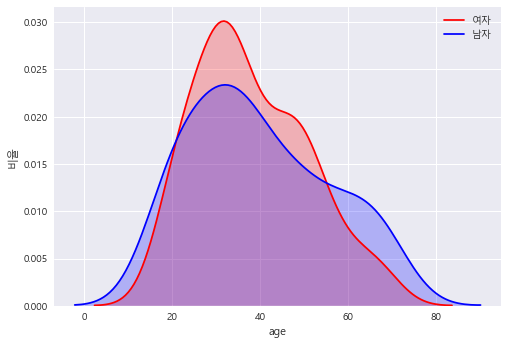

In [10]:
g = sns.kdeplot(df.query('Gender == 0')['Age'], color = "red",shade= True)
g = sns.kdeplot(df.query('Gender == 1')['Age'], color = 'blue', shade = True)
g.set_xlabel('age') # matplotlib의 xlabel
g.set_ylabel('비율')
g = g.legend(['여자','남자'])
plt.show()

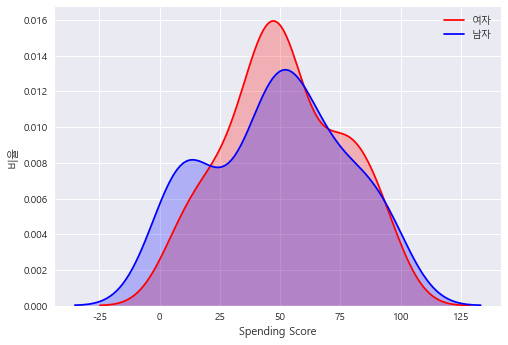

In [11]:
g = sns.kdeplot(df.query('Gender == 0')['Spending Score (1-100)'], color = "red",shade= True)
g = sns.kdeplot(df.query('Gender == 1')['Spending Score (1-100)'], color = 'blue', shade = True)
g.set_xlabel('Spending Score') # matplotlib의 xlabel
g.set_ylabel('비율')
g = g.legend(['여자','남자'])
plt.show()

C:\Users\MiSung\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MiSung\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


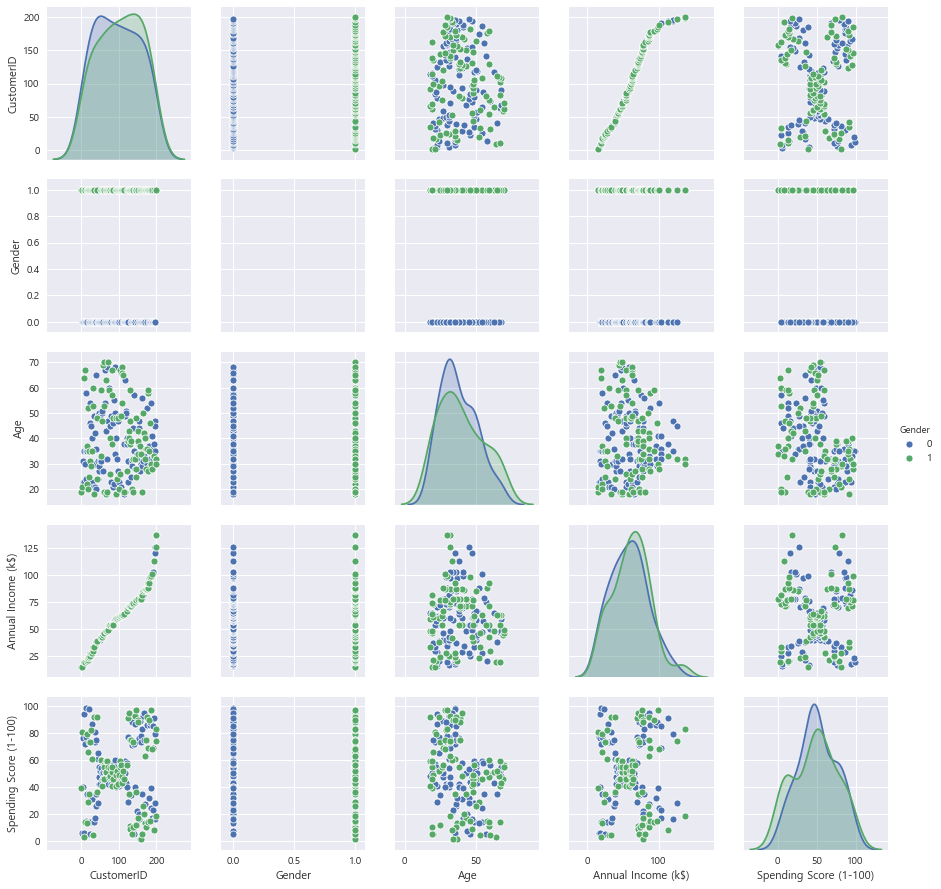

In [12]:
sns.pairplot(df,hue="Gender")

#### 이 결과를 보니까 Spending Score 와 Annual Income 으로 그린 거에서 뭉쳐있는게 보인다.

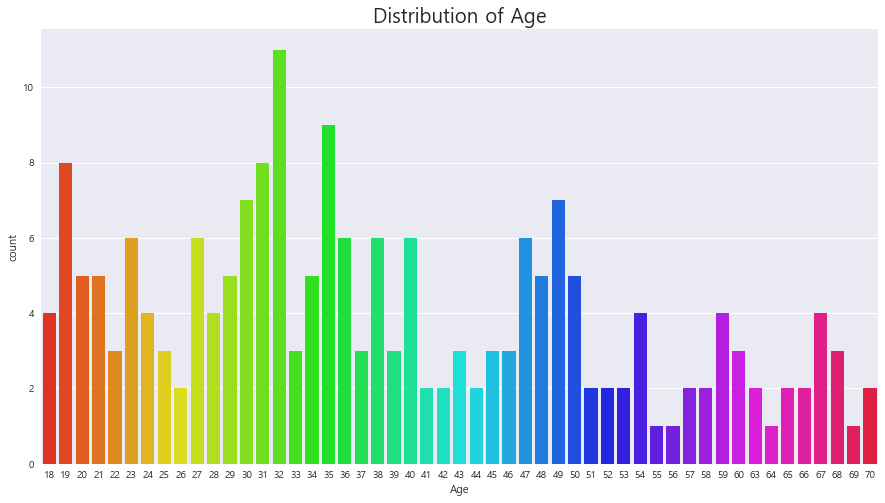

In [13]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

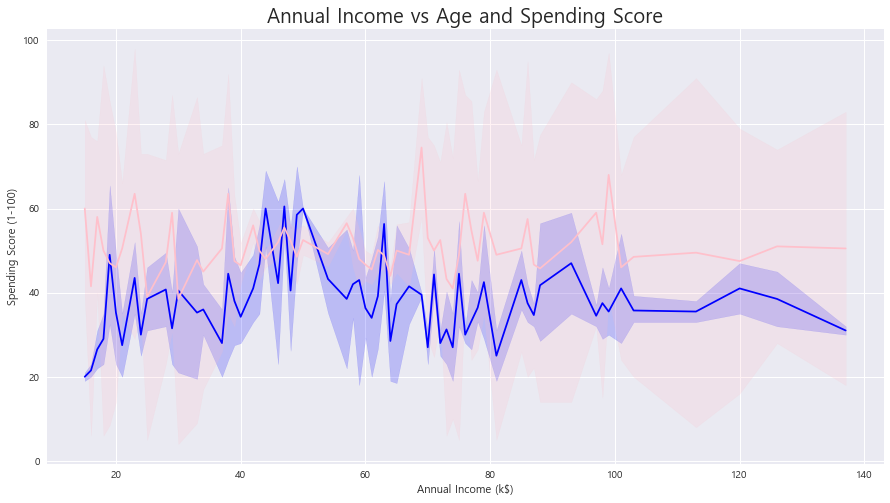

In [14]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [15]:
# annual incomes , spending scores
x = df.iloc[:, [3, 4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Hierarchical Clustering

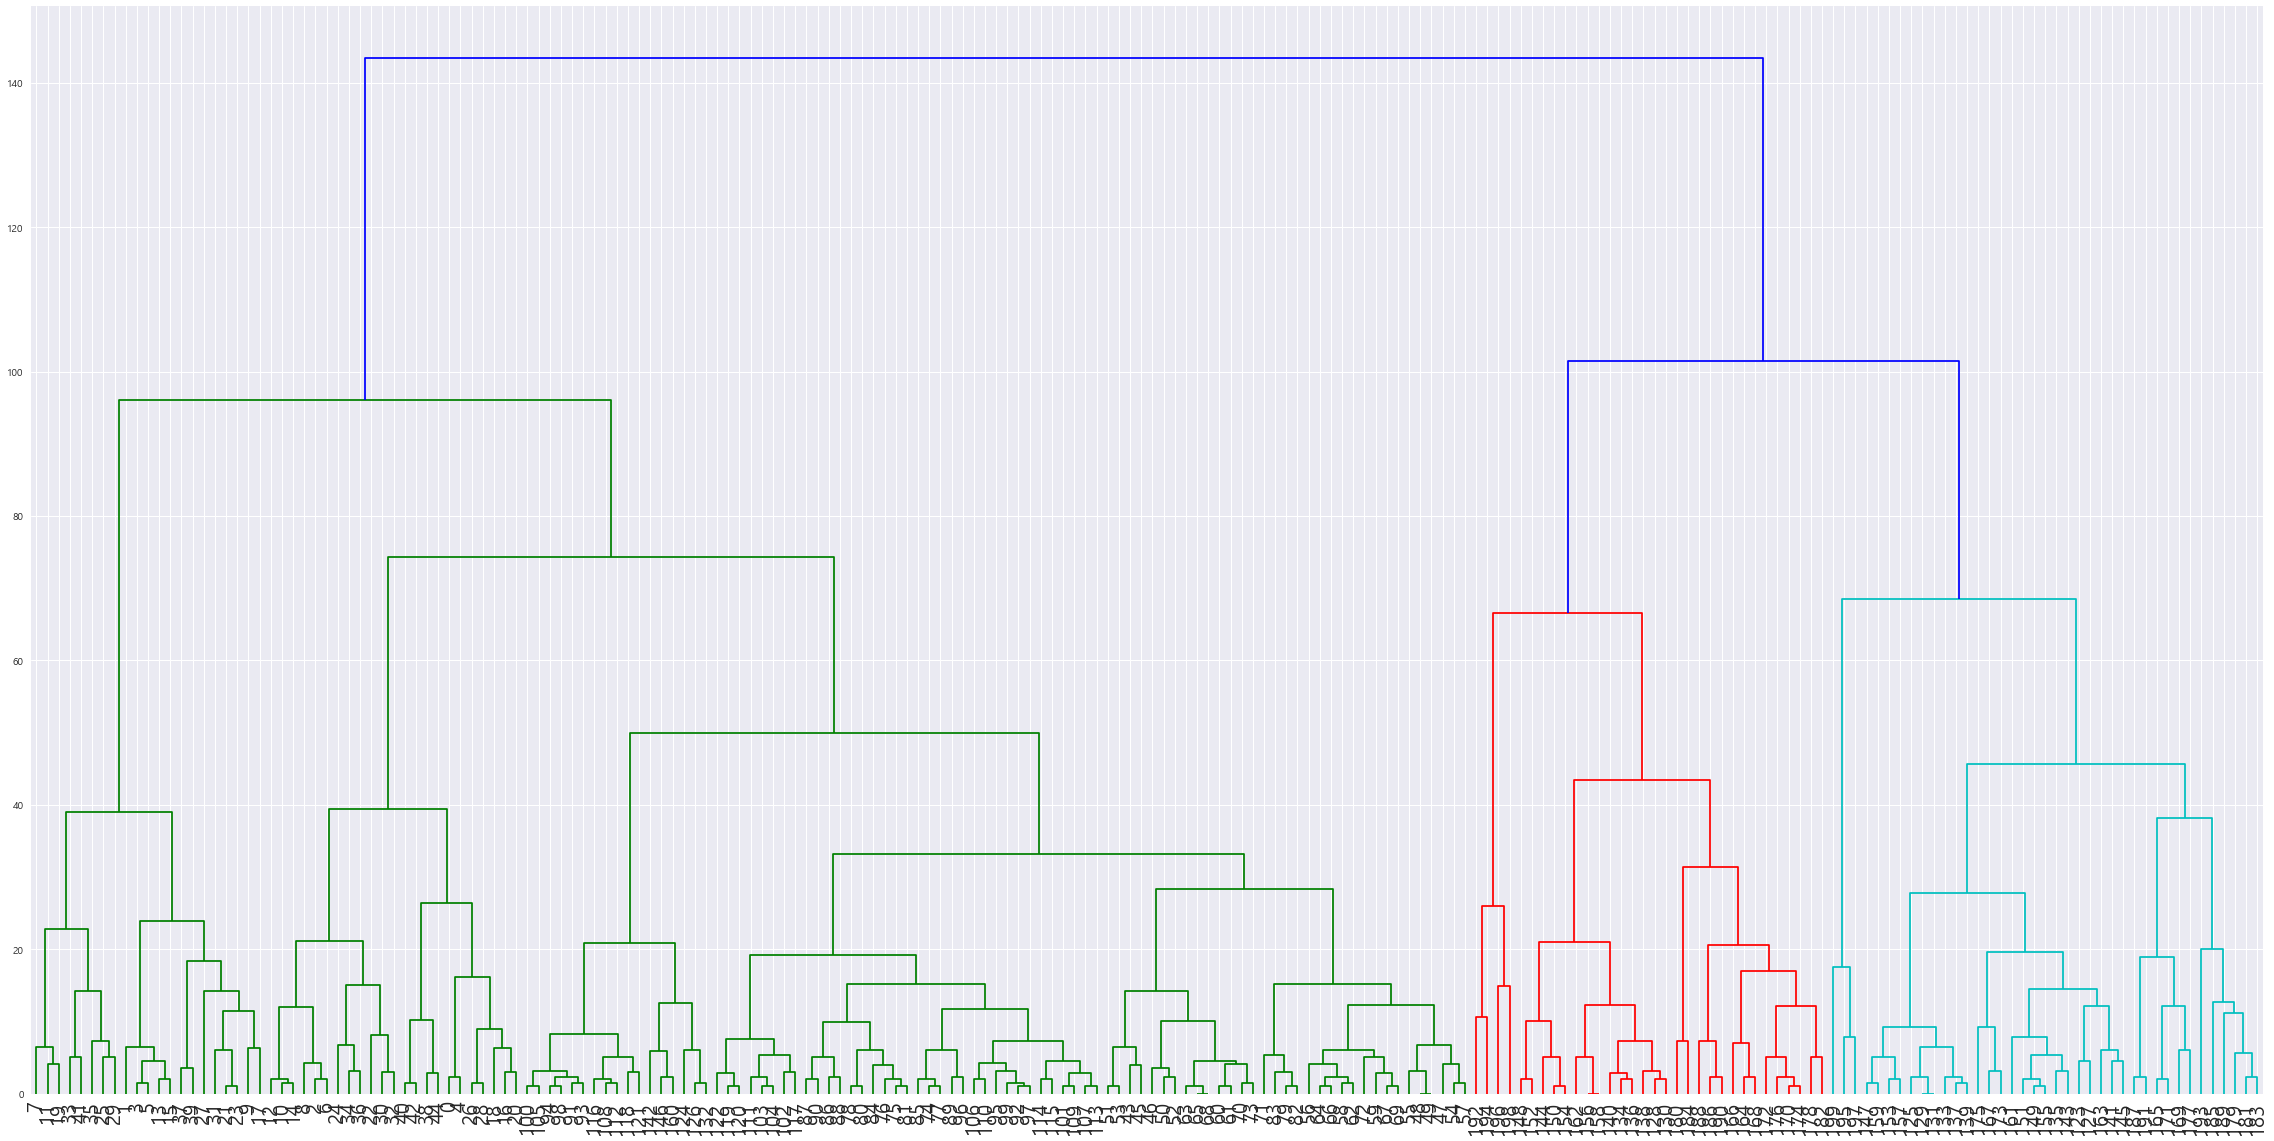

In [16]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
# method = 'single','comfplete', 'average', 'weighted', 'centroid', 'median', 'ward'

# x 값은 : Spending Score 와 annual incomes > 이 변수를 가지고 클러스터링 한다. 
mergings = linkage(x, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))

dendrogram(mergings,
           #labels = df.as_matrix(columns=['Spending Score (1-100)','Age' ]),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [17]:
from scipy.cluster.hierarchy import fcluster

# fcluster(linkage함수, 클러스터링을 멈추도록하는 임계값, 거리를 기준으로)
# 위의 덴드로그램에서 클러스터간의 거리가 3인 지점에서 자르면 3개의 cluster가 형성됨을 알 수 있다.
# 따라서 임계값을 3으로 정한다.
predict = pd.DataFrame(fcluster(mergings,3,criterion='distance'))
predict.columns=['predict'] # predict column에 예측 결과

# 예측값과 라벨값 비교하기
ct = pd.crosstab(predict['predict'],df['Spending Score (1-100)'])
print(ct)

Spending Score (1-100)  1   3   4   5   6   7   8   9   10  11  ...  89  90  \
predict                                                         ...           
1                        0   0   0   0   0   0   0   0   0   0  ...   0   0   
2                        0   0   0   0   0   0   0   0   0   0  ...   0   0   
3                        0   0   0   0   0   0   0   0   0   0  ...   0   0   
4                        0   0   0   0   0   0   0   0   0   0  ...   0   0   
5                        0   0   0   0   0   0   0   0   0   0  ...   0   0   
6                        0   0   0   0   0   0   0   0   0   0  ...   0   0   
7                        0   0   0   0   0   0   0   0   0   0  ...   0   0   
8                        0   0   0   0   0   0   0   0   0   0  ...   0   0   
9                        0   0   0   0   0   0   0   0   0   0  ...   0   0   
10                       0   0   0   0   0   0   0   0   0   0  ...   0   0   
11                       0   0   0   0   0   0   0  

### K-means Clustering

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns


In [19]:
x = df.iloc[:, [2, 4]].values

x

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

### Elbow methods

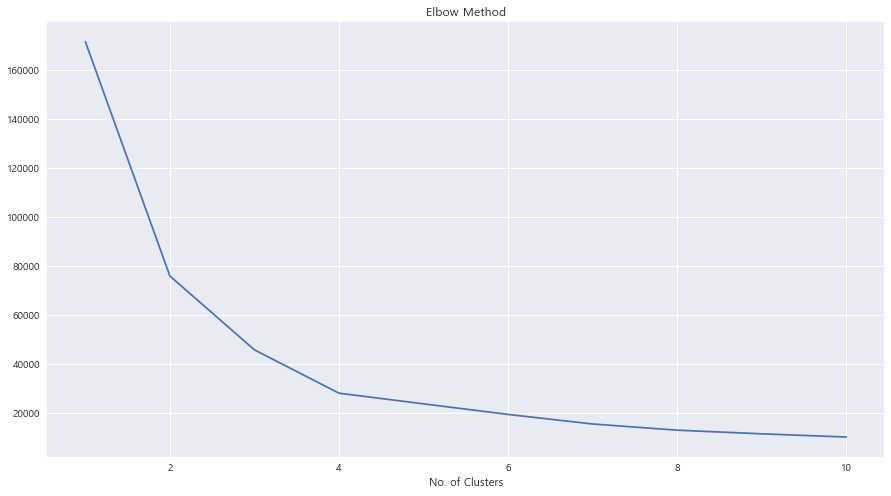

In [20]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.title("Elbow Method")
plt.show()

optimal number of cluster= 4

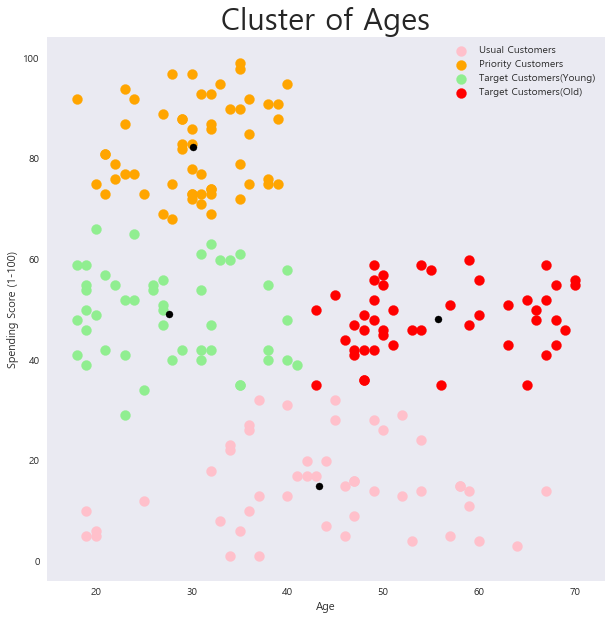

In [21]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [22]:
# Annual Income (k$) , Spending Score (1-100)
x = df.iloc[:, [3, 4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

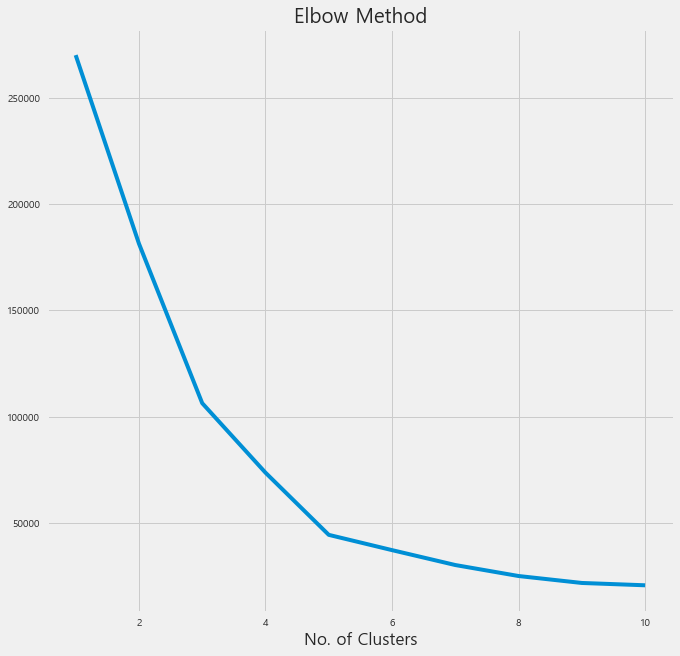

In [23]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.title("Elbow Method")
plt.show()

cluster =5 

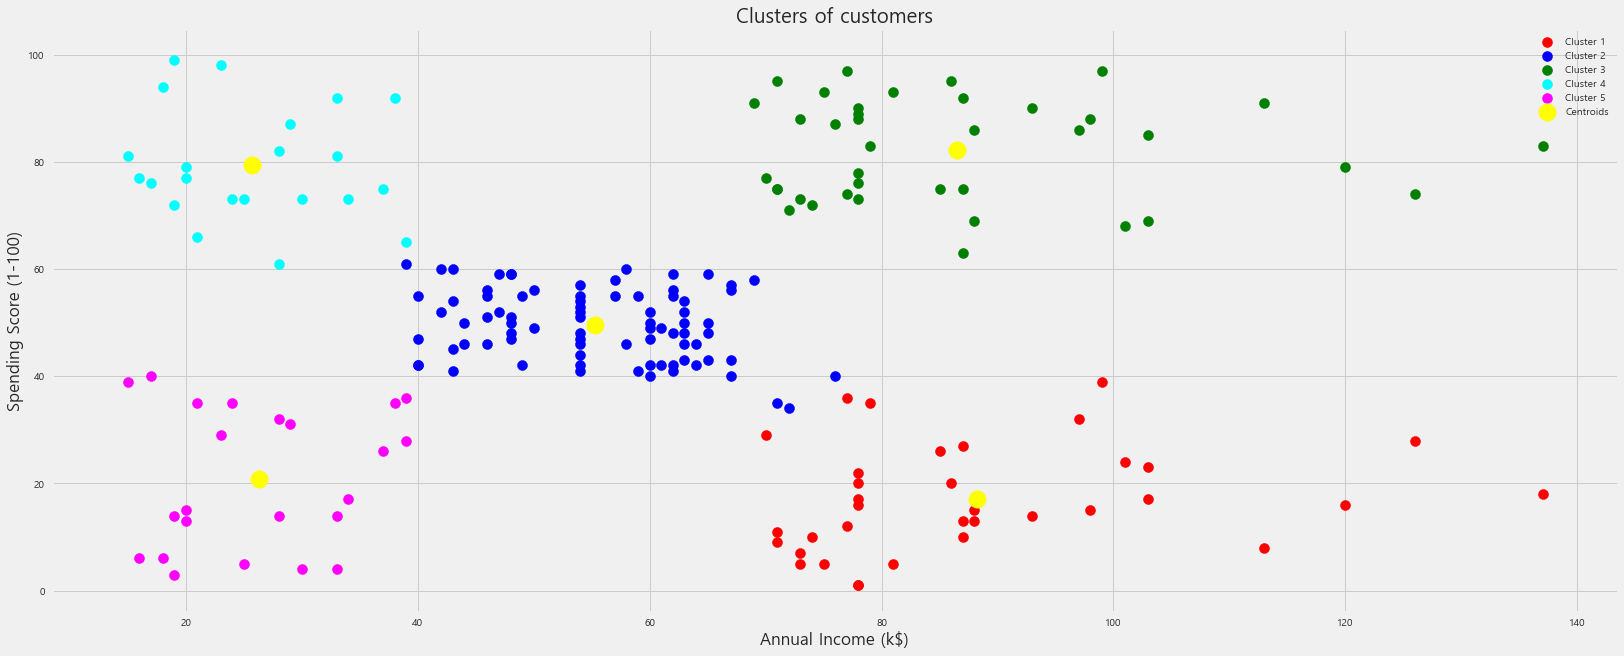

In [24]:
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

fig = plt.figure(figsize=(25, 10))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### DBSCAN

In [25]:
df_female = df[df['Gender'] == 0]
print(df_female.shape)
df_female.head()

(112, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6


In [26]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
import numpy as np

Clus_dataSet = df_female[['Age','Annual Income (k$)','Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_female['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
print(df_female[['Age','Annual Income (k$)','Spending Score (1-100)','Clus_Db']].head())

# number of labels
print("number of labels: ", set(labels))

   Age  Annual Income (k$)  Spending Score (1-100)  Clus_Db
2   20                  16                       6       -1
3   23                  16                      77        0
4   31                  17                      40       -1
5   22                  17                      76        0
6   35                  18                       6       -1
number of labels:  {0, 1, 2, 3, -1}


C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


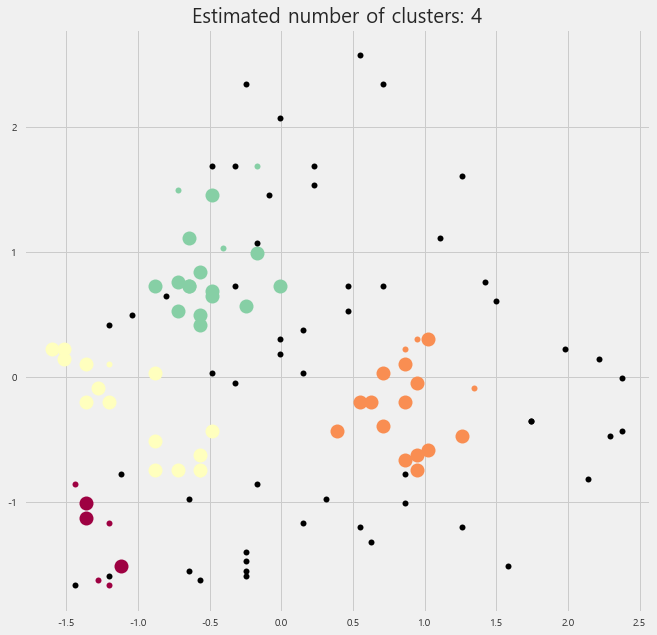

number of noise(s):  54


In [27]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

### Spectral Clustering
- 그래프(graph) 기반 군집화 기법인 Spectral Clustering
- 

In [28]:
feature = df[['Gender','Annual Income (k$)','Spending Score (1-100)']]

In [29]:
type(feature)

pandas.core.frame.DataFrame

In [30]:
y= pd.DataFrame(y)
type(y)

pandas.core.frame.DataFrame

In [31]:
from sklearn.cluster import SpectralClustering, AgglomerativeClustering


# create model and prediction
model = SpectralClustering(n_clusters=3,n_init=10)
model.fit(feature)

predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

In [32]:
r.head()

,Gender,Annual Income (k$),Spending Score (1-100),predict
0,1,15,39,0
1,1,15,81,0
2,0,16,6,0
3,0,16,77,0
4,0,17,40,0


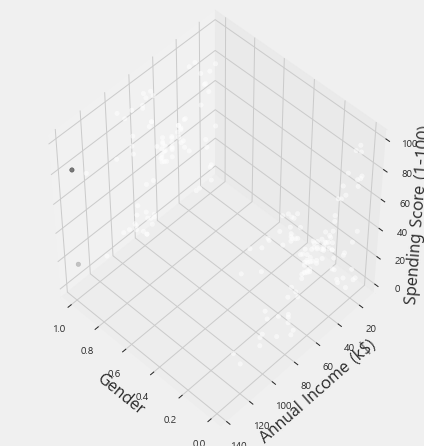

In [33]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Gender'],r['Annual Income (k$)'],r['Spending Score (1-100)'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Gender')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()